In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
import matplotlib.pyplot as plt

Daily Prices from  2019-12-07 to


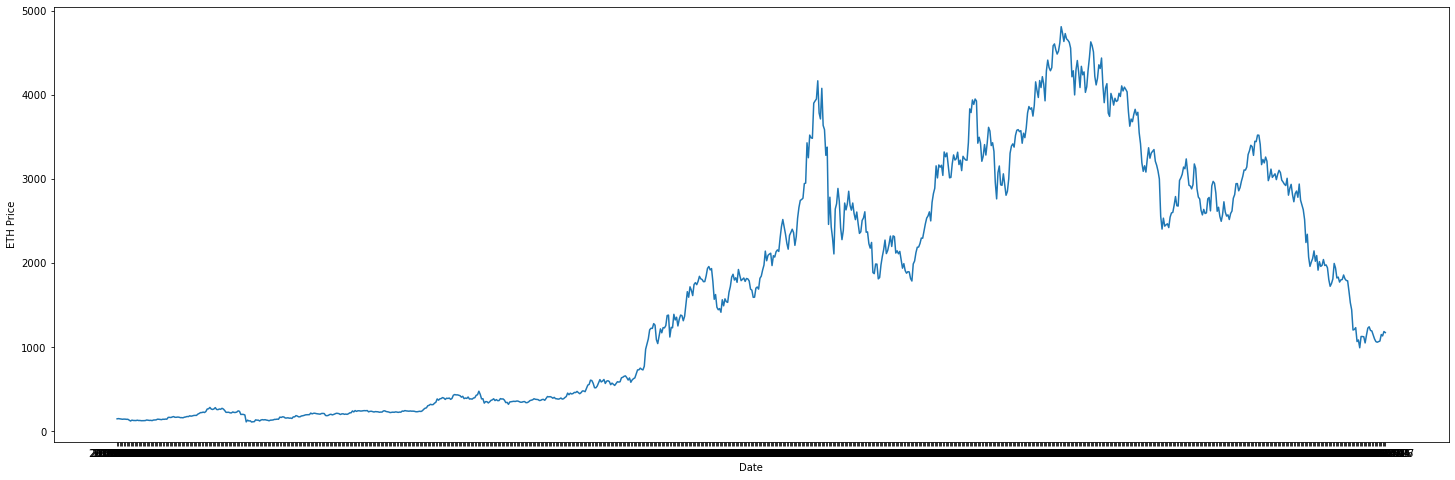

In [253]:
df = pd.read_csv("ETH-USD.csv")

sns.lineplot(x=df.Date,y=df.Close,data=df)
plt.ylabel("ETH Price")
print("Daily Prices from ",df.Date[0], "to")

In [254]:
len(list(df.Date))

944

In [255]:
df.head(4) #944 values

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-07,149.197601,149.799713,148.374771,148.768158,148.768158,5911233284
1,2019-12-08,148.743683,152.392929,148.313339,151.264725,151.264725,6441727252
2,2019-12-09,151.224396,151.913940,147.621368,148.225174,148.225174,6744206747
3,2019-12-10,148.179855,148.564468,144.907959,146.267044,146.267044,6859512025


Daily Prices up till 2020-05-05


Text(0, 0.5, 'ETH Price')

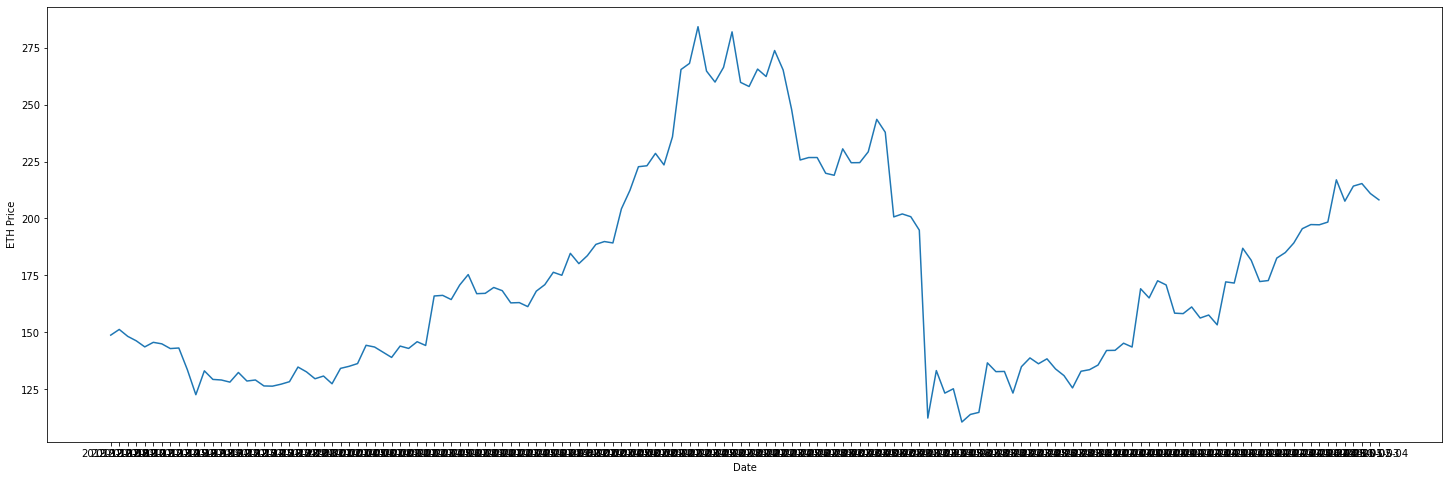

In [256]:
#If we invest one time around the bottom while being flexible(150 day frame)
df_dates = df.Date
print("Daily Prices up till",df_dates[150])
sns.lineplot(x=df.Date[0:150],y=df.Close[0:150],data=df)
plt.ylabel("ETH Price")

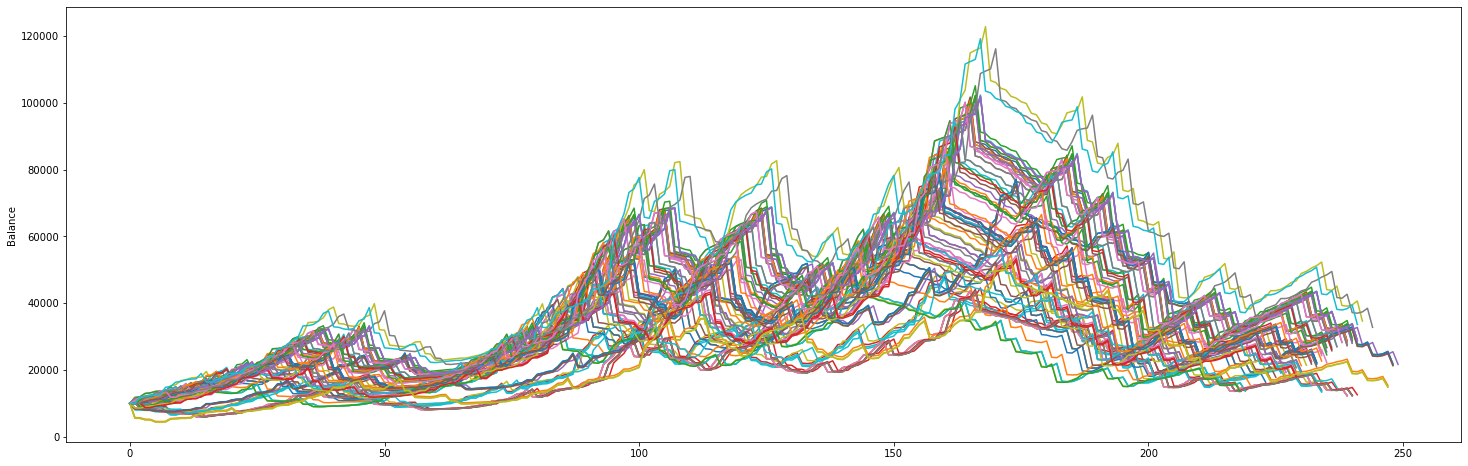

In [294]:
returns = []
trials = 100
for trial in range(trials):
    rand_date = random.randint(150)
    fram = df[rand_date:-1]
    frame = fram.reset_index()

    cash = 10000
    trading_fee = 0.005 #Coinbase spot fee 0.5%
    tol = 0.12  # tol percent falls

    entry_price =  frame.iloc[0].Close
    local_top = entry_price
    liq_price = (1-tol)*local_top
    bb_price = 0
    # print("Entry Price:",entry_price)
    # print("Ideal Liq. Price:", liq_price)
    # print("Entry date:", frame.iloc[0].Date)
    balance = []
    eth_count = []
    eth_price = []


    # print("Ideal Liq. Price:",liq_price)
    # print("-----------------------")
    balance.append((1-trading_fee)*cash)
    eth_count.append(((1-trading_fee)*cash)/entry_price)
    eth_price.append(entry_price)

    for i in range(1,len(frame.Close)):

        price = frame.iloc[i].Close

        if eth_count[-1] != 0:
            current_bal = eth_count[-1]*price
        else:
            current_bal = balance[-1]  

        if price > local_top and eth_count[-1] != 0: #HODL
            balance.append(current_bal)
            eth_count.append(eth_count[-1])
            eth_price.append(price)
            local_top = price
            liq_price = (1-tol)*local_top
            # print("H")

        elif price < liq_price and eth_count[-1] != 0: #LIQUIDATE
            balance.append(eth_count[-1]*price*(1-trading_fee))
            eth_count.append(0)
            eth_price.append(price)
            bb_price = price
            liq_price = price
            # print("L")
            # print("------------------------------")
            # print("Ideal Liq. Price:", liq_price)
            # print("Actual Liq. Price:",price) #This should be less than ideal liq. price by VERY LITTLE ideally
            # print("Exit date:", frame.iloc[i].Date)

        elif price >= bb_price and eth_count[-1] == 0: #BUYBACK(can upgrade)
            balance.append((1-trading_fee)*balance[-1])
            eth_count.append(balance[-1]/price)
            eth_price.append(price)
            # local_top = price/(1-tol)
            # liq_price = (1-tol)*local_top
            local_top = price
            liq_price = local_top
            # print("B")
            # print("Buyback Price:",price)
    
    returns.append((balance[-1]/cash))
        

    plt.plot([i for i in range(len(balance))],balance)
    plt.ylabel("Balance")

Sucess Rate:  100.0 %


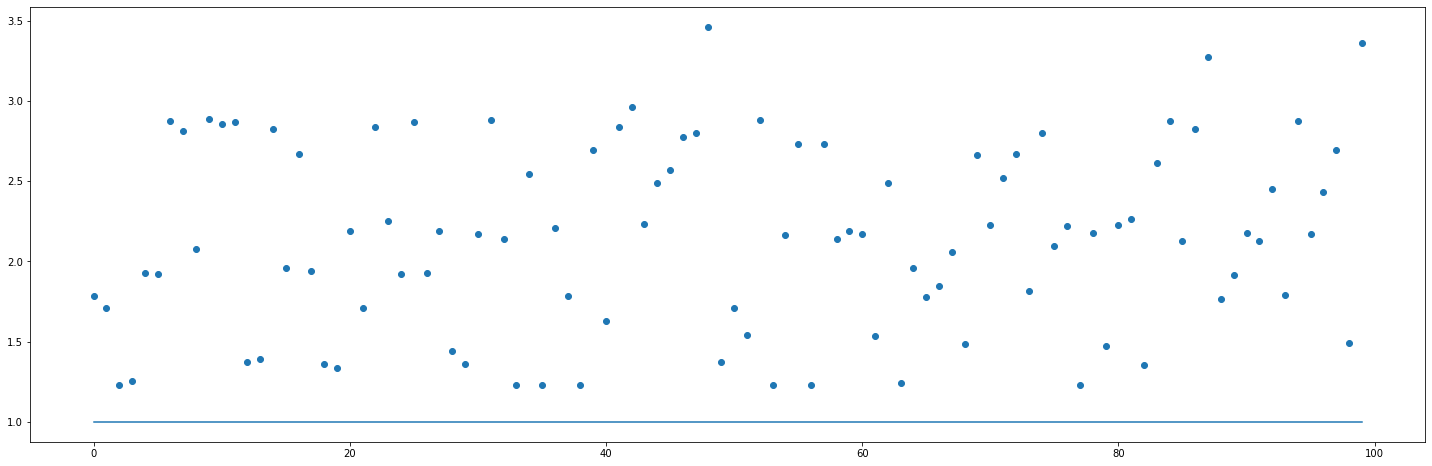

In [295]:
plt.scatter([i for i in range(len(returns))], returns)
plt.plot([i for i in range(len(returns))], [1 for i in range(len(returns))])
fails = len(np.where(np.asarray(returns) < 1)[0])
sucess_rate = (trials - fails)/trials
print("Sucess Rate: ",sucess_rate*100,"%")

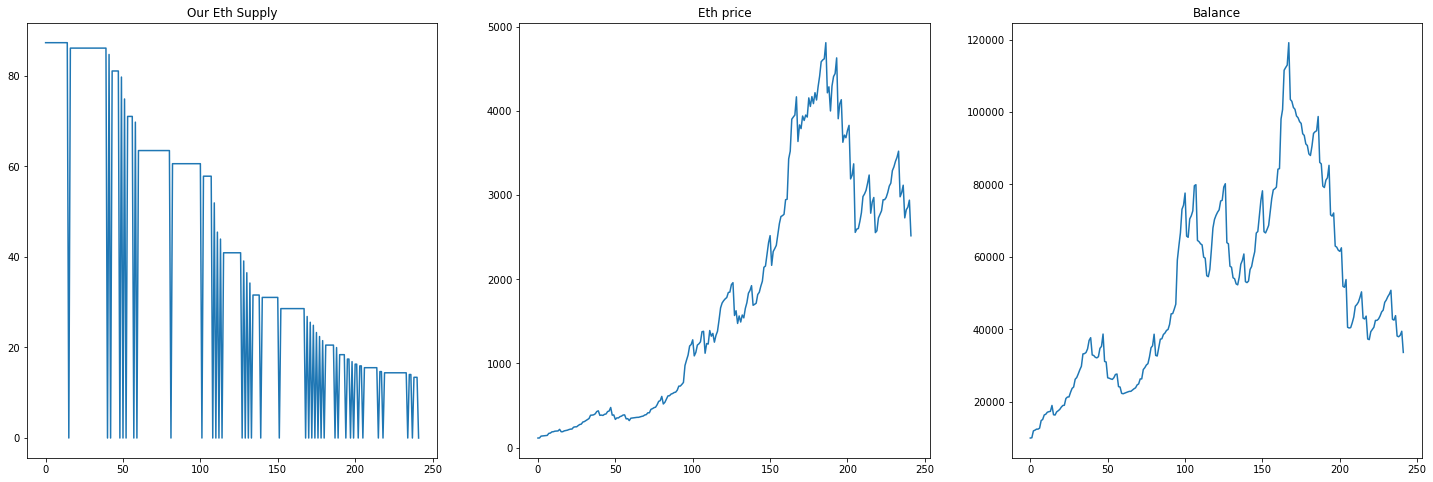

In [296]:
figure, axis = plt.subplots(1,3)
axis[0].plot([i for i in range(len(eth_count))],eth_count)
axis[0].set_title("Our Eth Supply")
axis[1].plot([i for i in range(len(eth_price))],eth_price)
axis[1].set_title("Eth price")
axis[2].plot([i for i in range(len(balance))],balance)
axis[2].set_title("Balance")

plt.rcParams["figure.figsize"] = (25,8)

# plt.plot([i for i in range(len(balance))],balance)
# plt.ylabel("Balance")
plt.show()